# Methylome Data Analysis

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Let's load the data and simplify the sample names

In [51]:
bulk_data = pd.read_csv("bulk_samples.csv", index_col=0)
new_colnames = list(bulk_data.columns)
new_colnames = [id.split("_")[0] for id in new_colnames]
bulk_data.columns = new_colnames
bulk_data

,GSM1052046,GSM1051753,GSM1052111,GSM1052007,GSM1051948,GSM1052043,GSM1051566,GSM1051939,GSM1051533,GSM1051613,...,GSM1051804,GSM1052213,GSM1051527,GSM1051602,GSM1051747,GSM1051755,GSM1051851,GSM1052037,GSM1051989,GSM1051761
CpGs,,,,,,,,,,,,,,,,,,,,,
cg26930596,0.345281,0.429527,0.366898,0.286082,0.244029,0.227953,0.370236,0.151721,0.438302,0.239145,...,0.440429,0.487776,0.218955,0.405363,0.330680,0.381894,0.365790,0.505487,0.130340,0.537773
cg08884752,0.804490,0.588899,0.680630,0.729852,0.837841,0.855354,0.628293,0.714503,0.678508,0.753003,...,0.618792,0.574934,0.806466,0.670479,0.699720,0.650543,0.620594,0.819819,0.836851,0.541566
cg26160564,0.764194,0.797626,0.905513,0.888256,0.969087,0.860470,0.845501,0.927306,0.766948,0.926865,...,0.837257,0.834544,0.915210,0.874978,0.922421,0.885134,0.891857,0.722543,0.902199,0.846609
cg01024458,0.959898,0.974212,0.963914,0.976108,0.968388,0.956077,0.955908,0.968160,0.954907,0.985184,...,0.973776,0.922287,0.971049,0.982491,0.966653,0.965391,0.969678,0.962965,0.979680,0.938864
cg13785123,0.505338,0.502080,0.570013,0.420020,0.293635,0.382621,0.413670,0.271397,0.509340,0.342881,...,0.618609,0.575102,0.295395,0.447203,0.313354,0.497702,0.489722,0.682124,0.237533,0.531504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg00156057,0.906375,0.854169,0.907594,0.905658,0.874830,0.919414,0.913981,0.912504,0.899146,0.896106,...,0.878528,0.847456,0.887761,0.887188,0.893545,0.868467,0.863025,0.892731,0.864525,0.871352
cg11414202,0.671586,0.623264,0.558246,0.593576,0.603116,0.554740,0.568572,0.548141,0.630713,0.556378,...,0.648267,0.625405,0.548249,0.501929,0.537822,0.523433,0.584360,0.654629,0.598805,0.609670
cg16144293,0.034953,0.030970,0.037165,0.022259,0.028125,0.016613,0.036890,0.034204,0.028572,0.017359,...,0.020533,0.044234,0.026896,0.026603,0.029495,0.031132,0.023033,0.026294,0.035084,0.017036


Let's take a quick look at the data

/home/cschuster/py3ws/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/cschuster/py3ws/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


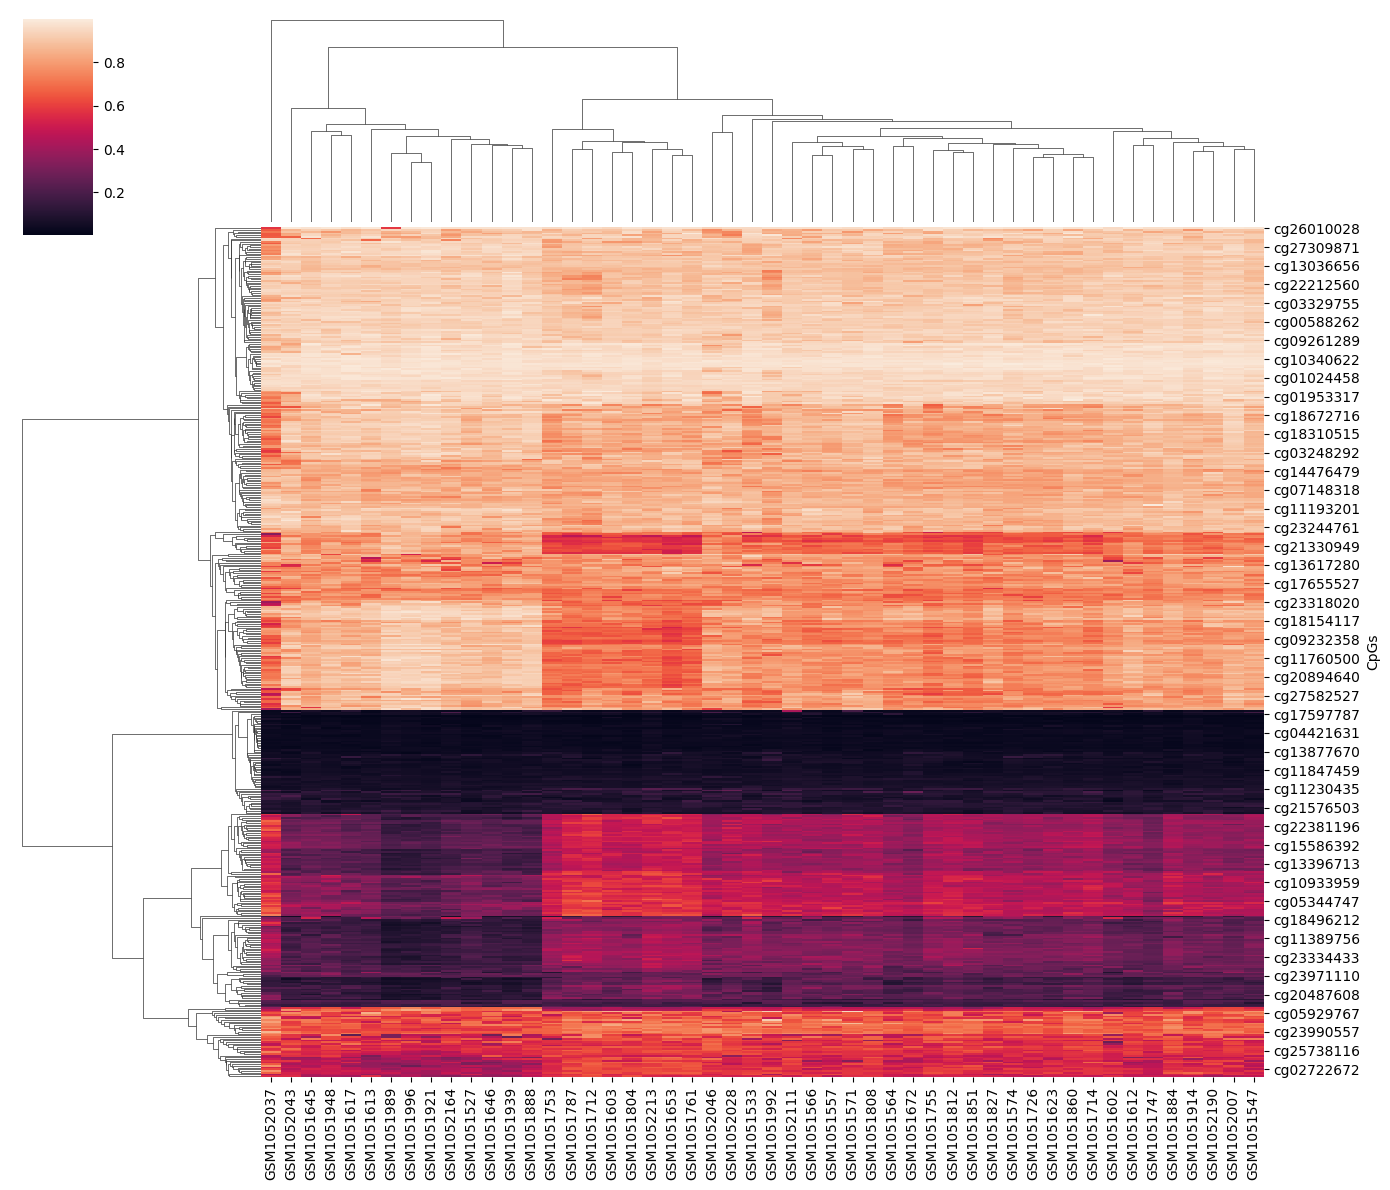

In [79]:
sns.clustermap(bulk_data, figsize=(14,12))

We can see that some CgP islands have almost no methylation across all samples, while some others seem to be differentially methylated

# Data correlation between samples

Let's explore correlation between samples and between CpG islands using Pearson Correlation

In [74]:
bulk_data_pearcorr = bulk_data.corr()

/tmp/ipykernel_6738/516372165.py:9: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


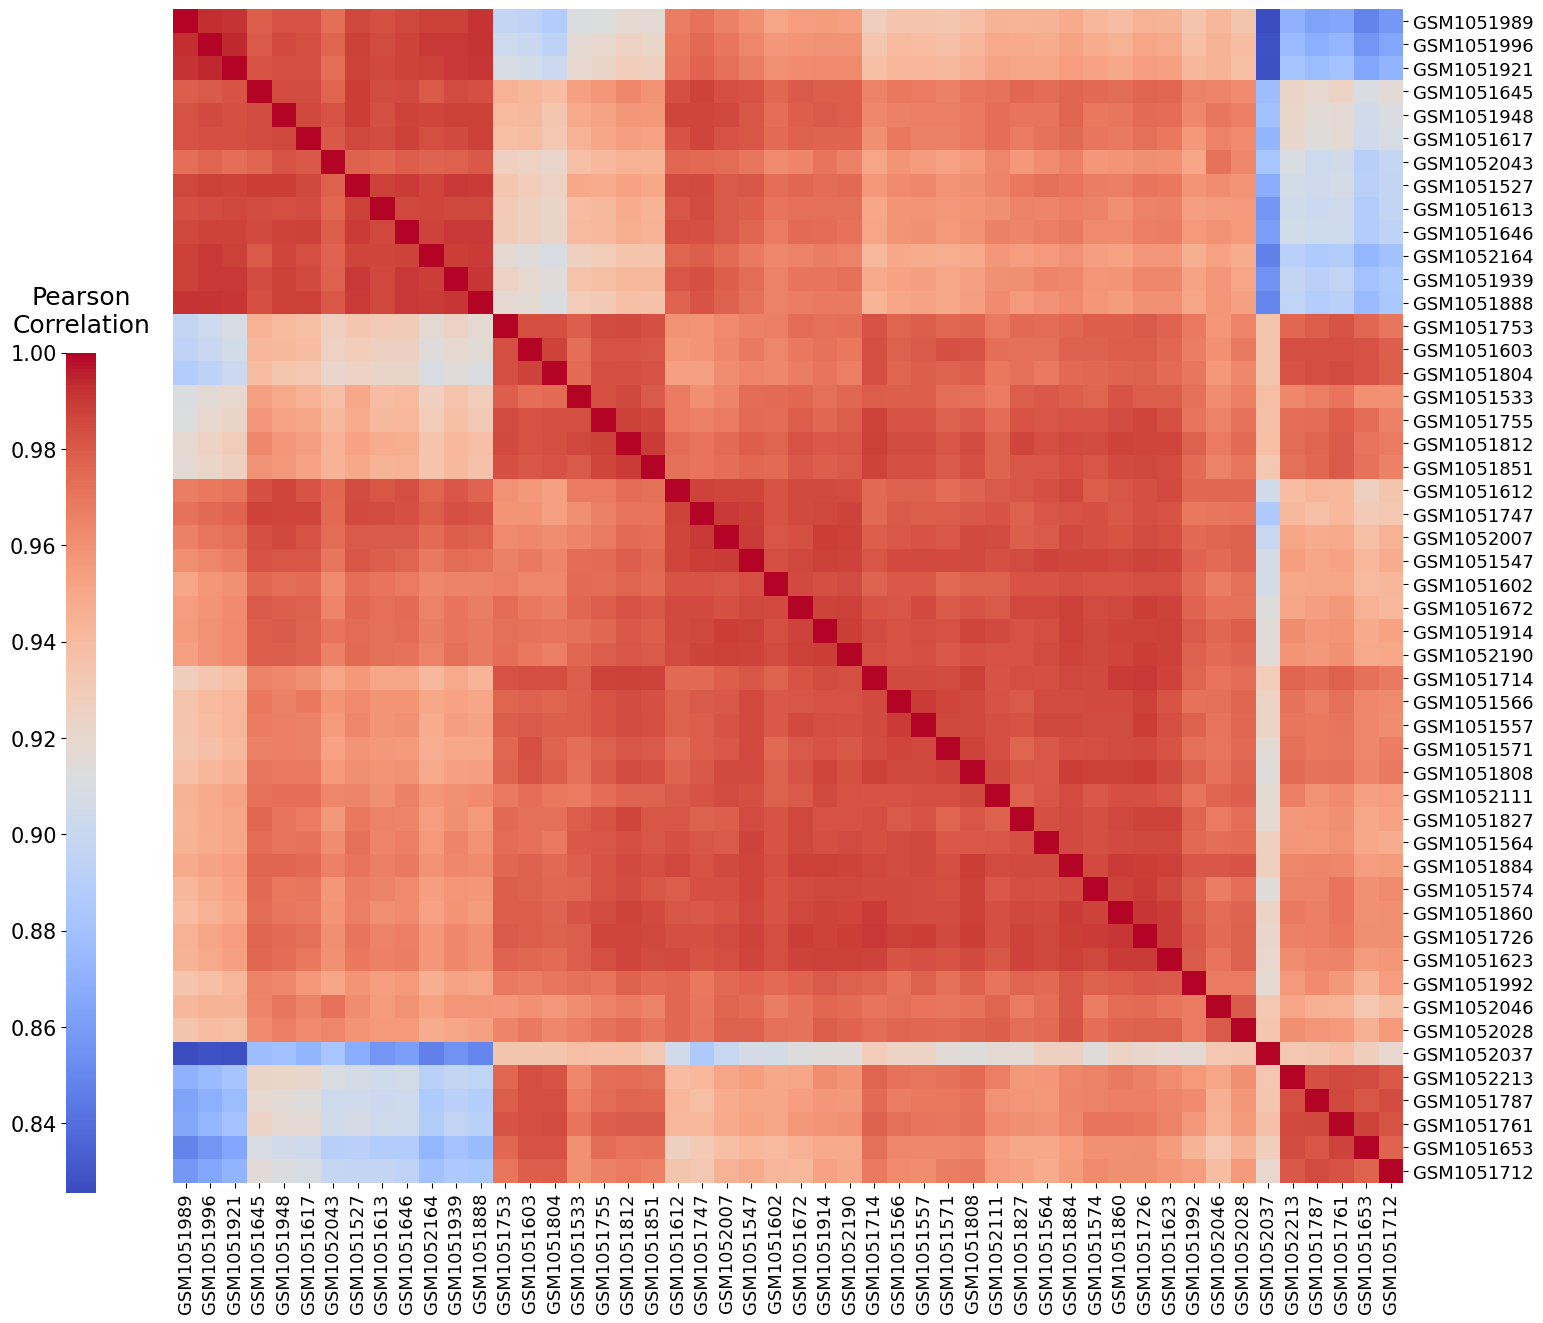

In [75]:
cg = sns.clustermap(bulk_data_pearcorr, figsize=(15,12),cmap="coolwarm",cbar_pos=(0.03, 0.09, 0.02, 0.7),
                    dendrogram_ratio=(0.1 , -0.1))
cg.ax_row_dendrogram.set_visible(False) #suppress row dendrogram
cg.ax_col_dendrogram.set_visible(False) #suppress column dendrogram
cg.cax.tick_params(labelsize=15)
cg.cax.set_title("Pearson\nCorrelation", size=18, pad=15)
cg.cax.yaxis.set_ticks_position('left')
cg.ax_heatmap.tick_params(labelsize=13)
plt.tight_layout()
plt.show()

We can see that there is a potential outlier (GSM1052037), and 3 clusters

Now we will create a color mapping based on the clustering by Pearson correlation

In [ ]:
samples_row_order = [bulk_data.transpose().index[i] for i in cg.dendrogram_row.reordered_ind]

sample_colors = {}
for i, item in enumerate(samples_row_order):
    if i < 13:
        sample_colors[item] = "red"
    elif i >= len(samples_row_order) - 5:
        sample_colors[item] = "green"
    elif i == len(samples_row_order) - 6:
        sample_colors[item] = "black"
    else:
        sample_colors[item] = "blue"

sample_colors

Would a PCA bare similarity with Pearson correlation?

In [81]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bulk_data.transpose())

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Get explained variance percentages
explained_var = pca.explained_variance_ratio_ * 100  # convert to percentage
# Create a DataFrame with PCA results
pca_df_bulk = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=bulk_data.transpose().index)

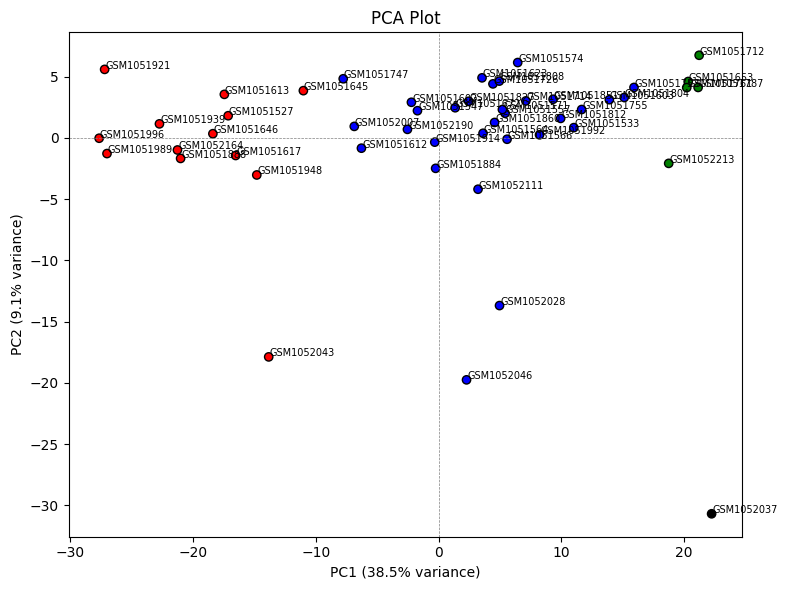

In [85]:
# Extract colors in order matching the PCA DataFrame index
colors = [sample_colors[sample] for sample in pca_df_bulk.index]

# Plot PCA with individual colors
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_bulk['PC1'], pca_df_bulk['PC2'], c=colors, edgecolor='k')

# Add sample labels
for sample in pca_df_bulk.index:
    plt.text(pca_df_bulk.loc[sample, 'PC1'] + 0.05,
             pca_df_bulk.loc[sample, 'PC2'] + 0.05,
             sample,
             fontsize=7)

# Label axes with explained variance
plt.xlabel(f'PC1 ({explained_var[0]:.1f}% variance)')
plt.ylabel(f'PC2 ({explained_var[1]:.1f}% variance)')
plt.title('PCA Plot')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(False)
plt.tight_layout()
plt.show()

It is clear that PCA and Pearson correlation go hand in hand. Let's replot the clustermaps, but this time taking into consideration the clusters we just determined

/home/cschuster/py3ws/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/cschuster/py3ws/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


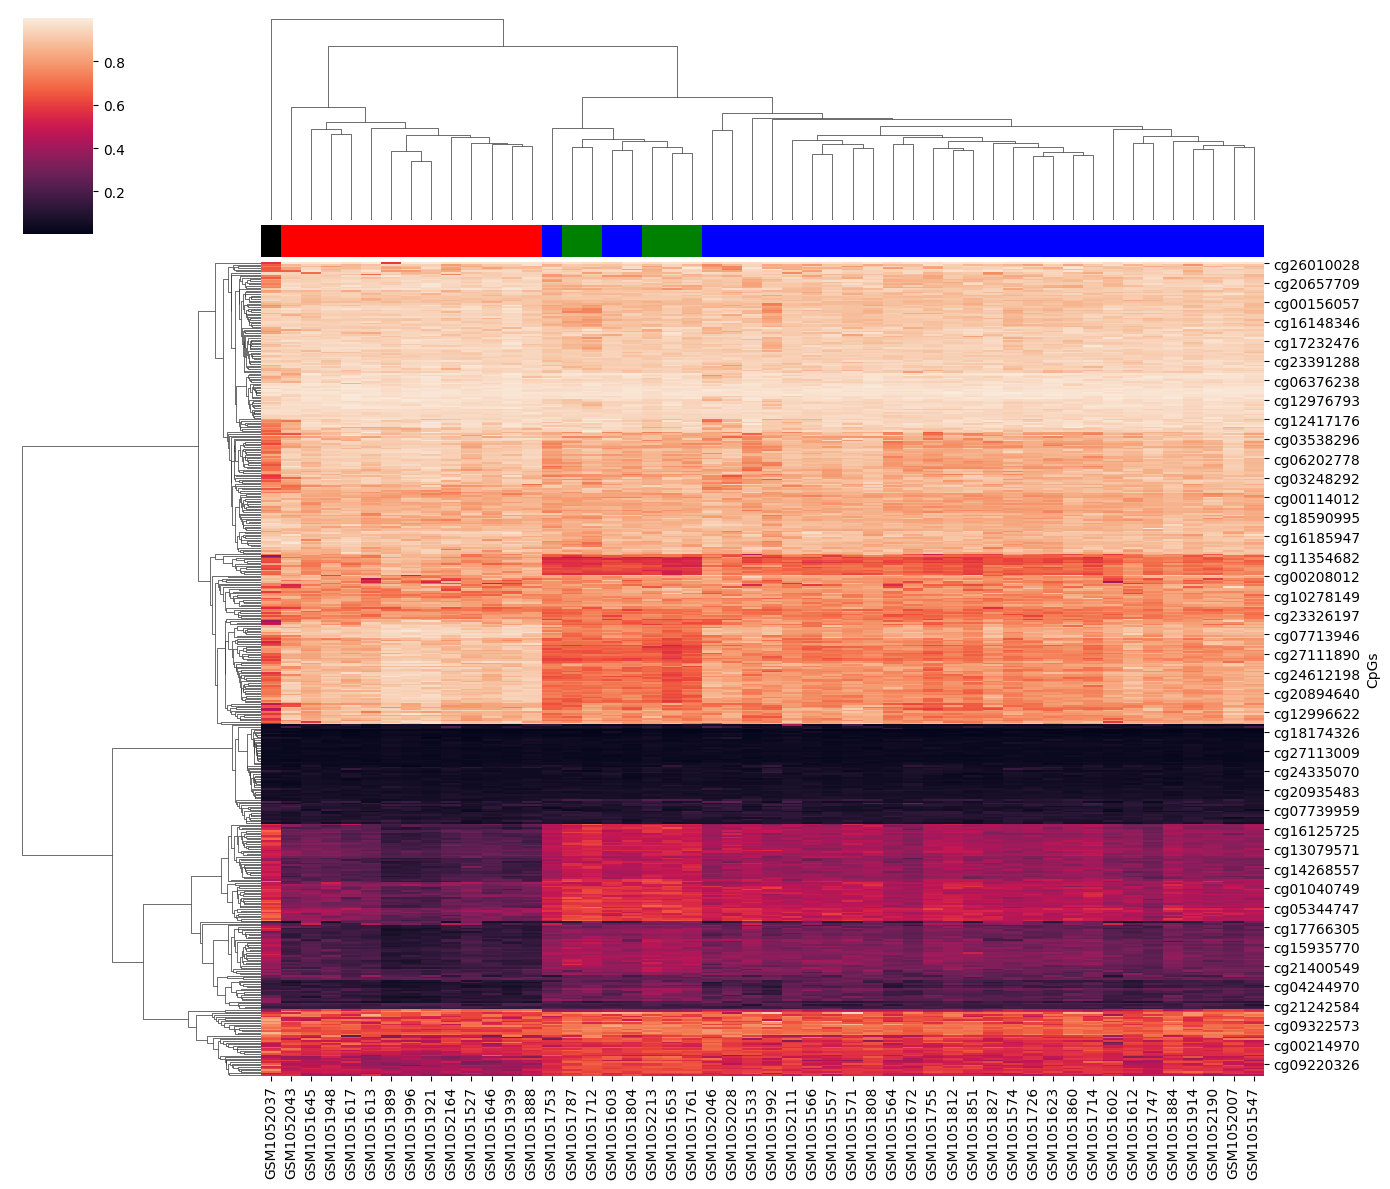

In [80]:
colors = [sample_colors[sample] for sample in bulk_data.columns]
cg = sns.clustermap(bulk_data, col_colors = colors, figsize=(14,12))
plt.show()

We can see how the outlier differs a bit from the other samples, and that the clusters we determined with Pearson Correlation are cherent with this clustermap, although the green cluster may just be spurious